<a href="https://colab.research.google.com/github/david-ewing-nz/STAT448-A3/blob/main/STAT448_Assignment3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAT448 Assignment 3 - Solution

##Lillian Li  (32198314)
##David Ewing (82171149)
## 2025-05-13
This notebook provides detailed answers and implementation for the STAT448 Assignment 3.

## Question 1A
**Draw the diagram of this network and calculate the output.**

In [18]:
import numpy as np
import pandas as pd
# input layer: weights
X = np.array([[5], [-7]])

print("--------")
print("Input Vector X:")
print(X)
print("This is a 2D input going into the hidden layer.")


# hidden layer: weights and bias
W1 = np.array([[1, 0], [2, 6]])
b1 = np.array([[-1], [3]])

print("--------")
print("Hidden Layer Weights W1 and Bias b1:")
print("W1:\n",W1)
print("W1 is a 2×2 weight matrix.")
print("b1:\n",b1)
print("b1 is a 2×1 bias vector.")
print("These define a hidden layer with 2 perseptrons.")

# output layer: weights and bias
W2 = np.array([[-1, 7]])
b2 = np.array([[5]])

print("--------")
print("Output Layer Weights W2 and Bias b2:")
print("W2:\n",W2)
print("W2 is a 1×2 weight matrix.")
print("b2:\n",b2)
print("b2 is a 1×1 bias scalor.")
print("These define a hidden layer with 2 perseptrons.")


# ReLU activation
def relu(z):
    return np.maximum(0, z)

# Forward pass through the network
print("--------")
print("Forward Pass through Hidden Layer:")

z1 = W1 @ X + b1
print("z1 = W1 @ X + b1:\n", z1)
print("This is the pre-activation output of the hidden layer.")

a1 = relu(z1)
print("a1 = ReLU(z1):\n", a1)
print("This is the post-activation output of the hidden layer using ReLU.")

print("--------")
print("Forward Pass through Output Layer:")

z2 = W2 @ a1 + b2
print("z2 = W2 @ a1 + b2:\n", z2)
print("This is the pre-activation output of the output layer.")

output = relu(z2)
print("Final output = ReLU(z2):\n", output)
print("This is the post-activation output of the network — the final result.")

print("--------")
print("Scalar output value:")
print(output.item())


--------
Input Vector X:
[[ 5]
 [-7]]
This is a 2D input going into the hidden layer.
--------
Hidden Layer Weights W1 and Bias b1:
W1:
 [[1 0]
 [2 6]]
W1 is a 2×2 weight matrix.
b1:
 [[-1]
 [ 3]]
b1 is a 2×1 bias vector.
These define a hidden layer with 2 perseptrons.
--------
Output Layer Weights W2 and Bias b2:
W2:
 [[-1  7]]
W2 is a 1×2 weight matrix.
b2:
 [[5]]
b2 is a 1×1 bias scalor.
These define a hidden layer with 2 perseptrons.
--------
Forward Pass through Hidden Layer:
z1 = W1 @ X + b1:
 [[  4]
 [-29]]
This is the pre-activation output of the hidden layer.
a1 = ReLU(z1):
 [[4]
 [0]]
This is the post-activation output of the hidden layer using ReLU.
--------
Forward Pass through Output Layer:
z2 = W2 @ a1 + b2:
 [[1]]
This is the pre-activation output of the output layer.
Final output = ReLU(z2):
 [[1]]
This is the post-activation output of the network — the final result.
--------
Scalar output value:
1


## Question 1B
**Apply filters F1, F2, and F3 to image I using stride 1 and no padding, then apply ReLU.**

--------
Input Image I:
tensor([[1., 0., 0., 0., 1.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 0.],
        [1., 0., 1., 0., 1.]])
This is a 5×5 black and white image (single channel), reshaped to 4D for PyTorch (NCHW format, float32):
N: Batch size         - (unsqueeze(0))
C: Number of channels - (unsqueeze(0))
HW: Image height and width


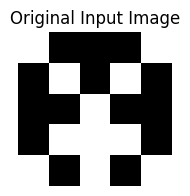

In [33]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

print("--------")
print("Input Image I:")
I = torch.tensor([[1, 0, 0, 0, 1],
                  [0, 1, 0, 1, 0],
                  [0, 0, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [1, 0, 1, 0, 1]],
                  dtype=torch.float32).unsqueeze(0).unsqueeze(0)
                                          # make compatalbe with torch.tensor
                                          # -> float, 2x add dimension.
print(I.squeeze())                        # remove single dimensions
                                          # for print only

print("This is a 5×5 black and white image (single channel), "
      "reshaped to 4D for PyTorch (NCHW format, float32):")
print("N: Batch size         - (unsqueeze(0))")
print("C: Number of channels - (unsqueeze(0))")
print("HW: Image height and width")
plt.figure(figsize=(3, 2))                # 3 in x 2 in - half of default size
plt.imshow(I.squeeze().numpy(),           # converts the tensor to a NumPy array
           cmap='gray',                   # black and white
           interpolation='nearest')       # no smoothing
plt.title("Original Input Image")
plt.axis('off')
plt.show()


In [35]:
def plot_tensor_with_values(tensor2d, title="", figsize=(3,2)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(tensor2d,                    #tensor
              cmap='gray',                 # black/white
              vmin=0,                      # black
              vmax=1,                      # white
              interpolation='nearest')     # no smooting
    for (i, j), val in np.ndenumerate(tensor2d.numpy()):
        color = 'black' if val > 0.5 else 'white'
        ax.text(j, i, str(int(val)), ha='center', va='center', color=color, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.show()



filters = [
    {
        "name": "Filter F1",
        "comment": "Detects centre pixel value",
        "tensor": torch.tensor([[0, 0, 0],
                                [0, 1, 0],
                                [0, 0, 0]], dtype=torch.float32)
    },
    {
        "name": "Filter F2",
        "comment": "All-zero filter (should produce zero output)",
        "tensor": torch.zeros((3, 3), dtype=torch.float32)
    },
    {
        "name": "Filter F3",
        "comment": "Edge detection (Laplacian-style)",
        "tensor": torch.tensor([[ 0, -1,  0],
                                [-1,  4, -1],
                                [ 0, -1,  0]], dtype=torch.float32)
    }
]

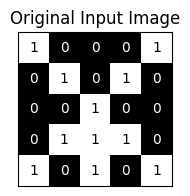

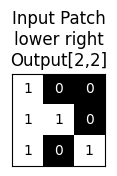

----------------------------------------
Filter F1: Detects centre pixel value
tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]])


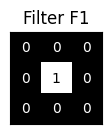

--------
Filter F1 convolution:
Raw output:
 tensor([[1., 0., 1.],
        [0., 1., 0.],
        [1., 1., 1.]])


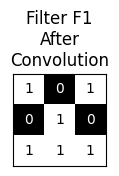

--------
Filter F1 ReLU result
ReLU output:
 tensor([[1., 0., 1.],
        [0., 1., 0.],
        [1., 1., 1.]])


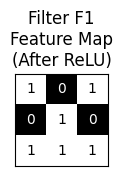


-------- calculation for lower right cell --------
-------- calculation for lower right cell --------


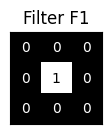

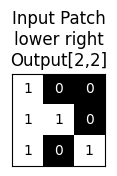

,Filter Index,Image Index,Filter Weight,Image Pixel,Product
0,"F[0,0]","I[2,2]",0.0,1.0,0.0
1,"F[0,1]","I[2,3]",0.0,0.0,0.0
2,"F[0,2]","I[2,4]",0.0,0.0,0.0
3,"F[1,0]","I[3,2]",0.0,1.0,0.0
4,"F[1,1]","I[3,3]",1.0,1.0,1.0
5,"F[1,2]","I[3,4]",0.0,0.0,0.0
6,"F[2,0]","I[4,2]",0.0,1.0,0.0
7,"F[2,1]","I[4,3]",0.0,0.0,0.0
8,"F[2,2]","I[4,4]",0.0,1.0,0.0
9,,,,Sum,1.0


----------------------------------------
Filter F2: All-zero filter (should produce zero output)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


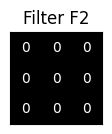

--------
Filter F2 convolution:
Raw output:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


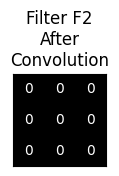

--------
Filter F2 ReLU result
ReLU output:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


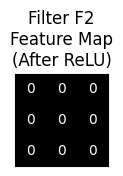


-------- calculation for lower right cell --------
-------- calculation for lower right cell --------


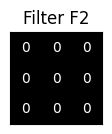

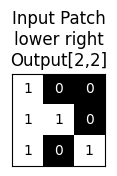

,Filter Index,Image Index,Filter Weight,Image Pixel,Product
0,"F[0,0]","I[2,2]",0.0,1.0,0.0
1,"F[0,1]","I[2,3]",0.0,0.0,0.0
2,"F[0,2]","I[2,4]",0.0,0.0,0.0
3,"F[1,0]","I[3,2]",0.0,1.0,0.0
4,"F[1,1]","I[3,3]",0.0,1.0,0.0
5,"F[1,2]","I[3,4]",0.0,0.0,0.0
6,"F[2,0]","I[4,2]",0.0,1.0,0.0
7,"F[2,1]","I[4,3]",0.0,0.0,0.0
8,"F[2,2]","I[4,4]",0.0,1.0,0.0
9,,,,Sum,0.0


----------------------------------------
Filter F3: Edge detection (Laplacian-style)
tensor([[ 0., -1.,  0.],
        [-1.,  4., -1.],
        [ 0., -1.,  0.]])


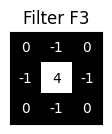

--------
Filter F3 convolution:
Raw output:
 tensor([[ 4., -3.,  4.],
        [-3.,  3., -3.],
        [ 3.,  0.,  3.]])


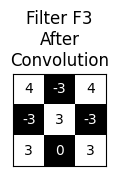

--------
Filter F3 ReLU result
ReLU output:
 tensor([[4., 0., 4.],
        [0., 3., 0.],
        [3., 0., 3.]])


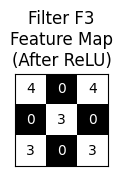


-------- calculation for lower right cell --------
-------- calculation for lower right cell --------


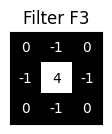

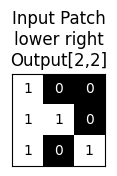

,Filter Index,Image Index,Filter Weight,Image Pixel,Product
0,"F[0,0]","I[2,2]",0.0,1.0,0.0
1,"F[0,1]","I[2,3]",-1.0,0.0,-0.0
2,"F[0,2]","I[2,4]",0.0,0.0,0.0
3,"F[1,0]","I[3,2]",-1.0,1.0,-1.0
4,"F[1,1]","I[3,3]",4.0,1.0,4.0
5,"F[1,2]","I[3,4]",-1.0,0.0,-0.0
6,"F[2,0]","I[4,2]",0.0,1.0,0.0
7,"F[2,1]","I[4,3]",-1.0,0.0,-0.0
8,"F[2,2]","I[4,4]",0.0,1.0,0.0
9,,,,Sum,3.0


In [39]:
plot_tensor_with_values(I.squeeze(), "Original Input Image")
patch = I[0, 0, 2:5, 2:5] #image, batch, rows, columns for lower right pixel
plot_tensor_with_values(patch, f"Input Patch\nlower right\nOutput[2,2]", figsize=(1.8, 1.2))
# Loop through filters
for f in filters:
    print("----------------------------------------")
    print(f"{f['name']}: {f['comment']}")
    F_tensor = f["tensor"].unsqueeze(0).unsqueeze(0)
    print(F_tensor.squeeze())

    plot_tensor_with_values(F_tensor.squeeze(), f"{f['name']}", figsize=(1.8, 1.2))

    print("--------")
    print(f"{f['name']} convolution:")
    out = F.conv2d(I, F_tensor, stride=1)
    print("Raw output:\n", out.squeeze())
    plot_tensor_with_values(out.squeeze(), f"{f['name']}\nAfter\nConvolution", figsize=(1.8, 1.2))

    print("--------")
    print(f"{f['name']} ReLU result")
    relu_out = F.relu(out)
    print("ReLU output:\n", relu_out.squeeze())
    plot_tensor_with_values(relu_out.squeeze(), f"{f['name']}\nFeature Map\n(After ReLU)", figsize=(1.8, 1.2))
    print("\n-------- calculation for lower right cell --------")
    print(  "-------- calculation for lower right cell --------")
    patch = I[0, 0, 2:5, 2:5] #image, batch, rows, columns

    plot_tensor_with_values(F_tensor.squeeze(), f"{f['name']}", figsize=(1.8, 1.2))
    plot_tensor_with_values(patch, f"Input Patch\nlower right\nOutput[2,2]", figsize=(1.8, 1.2))
    breakdown_data = []
    conv_sum = 0
    for i in range(3):
        for j in range(3):
            fw = F_tensor[0, 0, i, j].item()
            px = patch[i, j].item()
            prod = fw * px
            conv_sum += prod
            breakdown_data.append({
                "Filter Index": f"F[{i},{j}]",
                "Image Index": f"I[{2+i},{2+j}]",
                "Filter Weight": fw,
                "Image Pixel": px,
                "Product": prod
            })
    breakdown_data.append({"Filter Index": "", "Image Index": "", "Filter Weight": "", "Image Pixel": "Sum", "Product": conv_sum})
    breakdown_data.append({"Filter Index": "", "Image Index": "", "Filter Weight": "", "Image Pixel": "ReLU", "Product": max(0, conv_sum)})

    df = pd.DataFrame(breakdown_data)
    display(df)

## Question 2
**Experiment with 10 configurations on Fashion-MNIST or CIFAR-10 and report the results.**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training configuration 1: {'filters': 32, 'kernel_size': 3, 'dense_units': 64, 'optimizer': 'adam', 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.9021


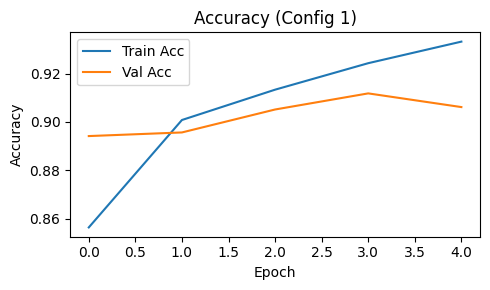


Training configuration 2: {'filters': 64, 'kernel_size': 5, 'dense_units': 128, 'optimizer': 'adam', 'batch_size': 64}
Test accuracy: 0.9135


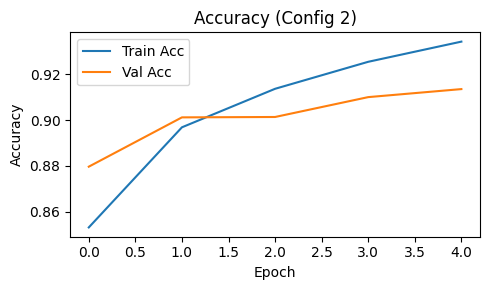


Training configuration 3: {'filters': 16, 'kernel_size': 3, 'dense_units': 32, 'optimizer': 'sgd', 'batch_size': 32}
Test accuracy: 0.8545


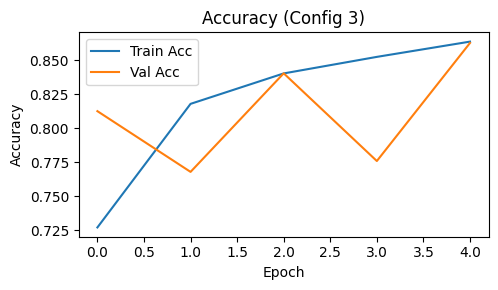


Training configuration 4: {'filters': 32, 'kernel_size': 5, 'dense_units': 64, 'optimizer': 'rmsprop', 'batch_size': 128}
Test accuracy: 0.8936


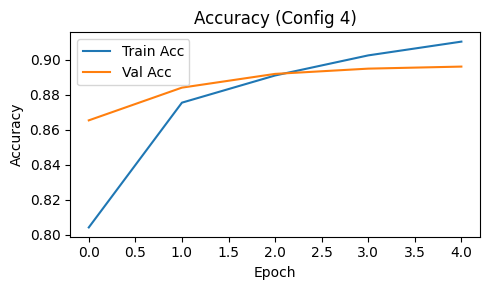


Training configuration 5: {'filters': 64, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'adam', 'batch_size': 32}
Test accuracy: 0.9121


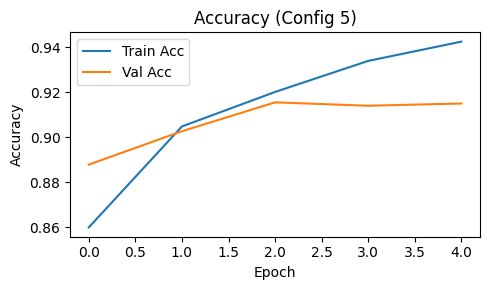


Training configuration 6: {'filters': 32, 'kernel_size': 3, 'dense_units': 32, 'optimizer': 'sgd', 'batch_size': 64}
Test accuracy: 0.8250


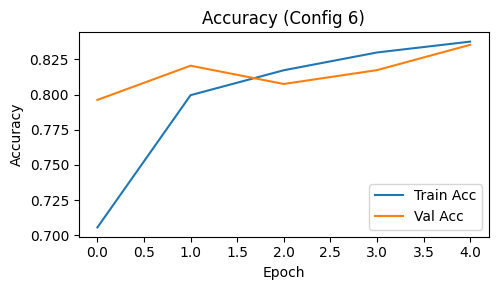


Training configuration 7: {'filters': 16, 'kernel_size': 5, 'dense_units': 64, 'optimizer': 'rmsprop', 'batch_size': 64}
Test accuracy: 0.9018


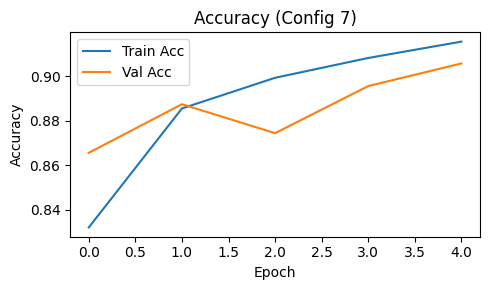


Training configuration 8: {'filters': 64, 'kernel_size': 5, 'dense_units': 32, 'optimizer': 'adam', 'batch_size': 128}
Test accuracy: 0.8978


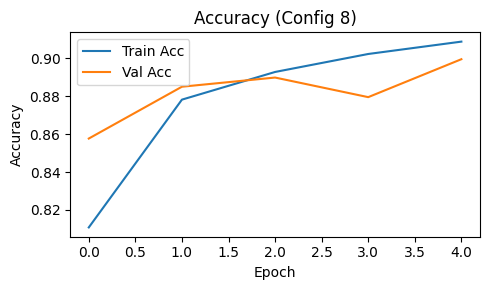


Training configuration 9: {'filters': 32, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'sgd', 'batch_size': 32}
Test accuracy: 0.8496


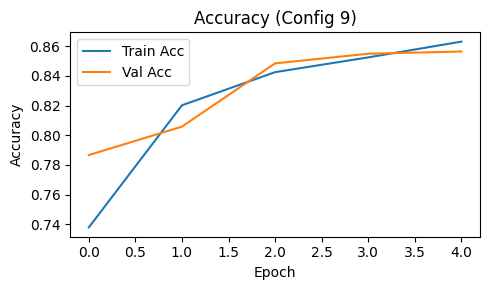


Training configuration 10: {'filters': 16, 'kernel_size': 3, 'dense_units': 64, 'optimizer': 'adam', 'batch_size': 64}
Test accuracy: 0.8993


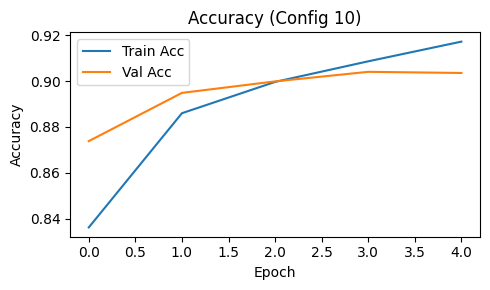

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define different parameter sets
#configs = [
#    {'filters': 32, 'kernel_size': 3, 'dense_units': 64,  'optimizer': 'adam',    'batch_size': 32},
#    {'filters': 64, 'kernel_size': 5, 'dense_units': 128, 'optimizer': 'adam',    'batch_size': 64},
#    {'filters': 16, 'kernel_size': 3, 'dense_units': 32,  'optimizer': 'sgd',     'batch_size': 32},
#    {'filters': 32, 'kernel_size': 5, 'dense_units': 64,  'optimizer': 'rmsprop', 'batch_size': 128},
#    {'filters': 64, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'adam',    'batch_size': 32},
#    {'filters': 32, 'kernel_size': 3, 'dense_units': 32,  'optimizer': 'sgd',     'batch_size': 64},
#    {'filters': 16, 'kernel_size': 5, 'dense_units': 64,  'optimizer': 'rmsprop', 'batch_size': 64},
#    {'filters': 64, 'kernel_size': 5, 'dense_units': 32,  'optimizer': 'adam',    'batch_size': 128},
#    {'filters': 32, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'sgd',     'batch_size': 32},
#    {'filters': 16, 'kernel_size': 3, 'dense_units': 64,  'optimizer': 'adam',    'batch_size': 64},
#]

#after intial testing, the cofigurations have been re-ordered by rank
configs = [
    {'filters': 64, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'adam',    'batch_size': 32},   # Rank 1
    {'filters': 64, 'kernel_size': 5, 'dense_units': 128, 'optimizer': 'adam',    'batch_size': 64},   # Rank 2
    {'filters': 16, 'kernel_size': 3, 'dense_units': 64,  'optimizer': 'adam',    'batch_size': 64},   # Rank 3
    {'filters': 32, 'kernel_size': 3, 'dense_units': 64,  'optimizer': 'adam',    'batch_size': 32},   # Rank 4
    {'filters': 32, 'kernel_size': 5, 'dense_units': 64,  'optimizer': 'rmsprop', 'batch_size': 128},  # Rank 5
    {'filters': 16, 'kernel_size': 5, 'dense_units': 64,  'optimizer': 'rmsprop', 'batch_size': 64},   # Rank 6
    {'filters': 64, 'kernel_size': 5, 'dense_units': 32,  'optimizer': 'adam',    'batch_size': 128},  # Rank 7
    {'filters': 32, 'kernel_size': 3, 'dense_units': 32,  'optimizer': 'sgd',     'batch_size': 64},   # Rank 8
    {'filters': 32, 'kernel_size': 3, 'dense_units': 128, 'optimizer': 'sgd',     'batch_size': 32},   # Rank 9
    {'filters': 16, 'kernel_size': 3, 'dense_units': 32,  'optimizer': 'sgd',     'batch_size': 32},   # Rank 10
]


results = []

# Loop through each config
for i, cfg in enumerate(configs, 1):
    print(f"\nTraining configuration {i}: {cfg}")

    model = models.Sequential([
        layers.Conv2D(cfg['filters'], (cfg['kernel_size'], cfg['kernel_size']),
                      activation='relu', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(cfg['dense_units'], activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=cfg['optimizer'],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=5,
                        batch_size=cfg['batch_size'],
                        validation_split=0.1,
                        verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}")

    results.append({
        'config': cfg,
        'test_accuracy': test_acc,
        'train_accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy']
    })

    # Plot training history for each
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"Accuracy (Config {i})")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
